In [44]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import math as m
from math import cos, pi
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from io import StringIO

In [29]:
temp1 = pd.read_csv('/Users/user/Desktop/Data Analysis/Freshsales/deals.csv')
temp2 = pd.read_csv('/Users/user/Desktop/Data Analysis/Freshsales/fd_lead_score.csv')

temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8859 entries, 0 to 8858
Data columns (total 2 columns):
dealid       8859 non-null object
leadscore    8859 non-null float64
dtypes: float64(1), object(1)
memory usage: 138.5+ KB


In [30]:
 Fd_Test = pd.merge(left=temp1, right=temp2, how='inner', left_on = 'dealid', right_on ='dealid'  )
#Fd_Test = pd.merge(left=temp1, right=temp2,how='inner', left_index=True,right_index=True)

In [37]:
#Fd_Test.head()
#Fd_Test.to_csv('/Users/user/Desktop/Data Analysis/Freshsales/Merged_Test.csv', encoding='utf-8')
Fd_Test.leadstage.unique()

array(['Won', 'Lost'], dtype=object)

In [39]:
Fd_Test['actual_value'] = np.where(Fd_Test['leadstage'] == 'Won', 1,0 )

In [40]:
Fd_Test.actual_value.unique()

array([1, 0])

In [41]:
Fd_Test['predicted_value'] = Fd_Test['leadscore']

In [42]:
Fd_Test.head()

,dealid,leadstage,leadscore,actual_value,predicted_value
0,00241075a8101f68c92825ee9f21bdd7e02d3eebfbdbdb...,Won,70.0,1,70.0
1,003f52435b2f2f6011cfc1f36f21f05ba7bf8a2dece8ca...,Won,9.0,1,9.0
2,00bcc5dff500a4f2dfab16384accafd439c2e17007468a...,Won,23.0,1,23.0
3,01276e472a533995a39f4283cc5dd5f34fa5e58e8ddd59...,Won,223.0,1,223.0
4,018b689a3dbd4b64480fd1e9dd05fdfeee957207535db4...,Won,22.0,1,22.0


In [60]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Fd_Test['actual_value'], Fd_Test['predicted_value'])
roc_auc = auc(false_positive_rate, true_positive_rate)

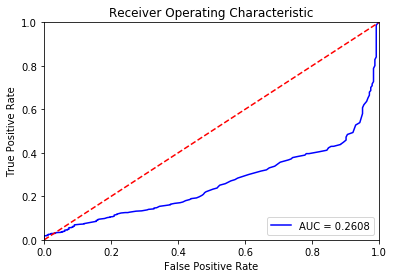

In [56]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
#label='AUC = %0.2f'% roc_auc)
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1])
plt.ylim([0.0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
thresholds


array([  3.88300000e+03,   6.93000000e+02,   6.27000000e+02,
         6.00000000e+02,   5.98000000e+02,   4.99000000e+02,
         4.79000000e+02,   4.78000000e+02,   4.76000000e+02,
         4.53000000e+02,   4.44000000e+02,   4.40000000e+02,
         4.32000000e+02,   4.30000000e+02,   4.18000000e+02,
         4.01000000e+02,   3.98000000e+02,   3.93000000e+02,
         3.92000000e+02,   3.81000000e+02,   3.64000000e+02,
         3.49000000e+02,   3.43000000e+02,   3.38000000e+02,
         3.36000000e+02,   3.33000000e+02,   3.19000000e+02,
         3.18000000e+02,   3.16000000e+02,   3.13000000e+02,
         3.12000000e+02,   3.10000000e+02,   3.08000000e+02,
         3.06000000e+02,   3.01000000e+02,   3.00000000e+02,
         2.99000000e+02,   2.98000000e+02,   2.94000000e+02,
         2.93000000e+02,   2.85000000e+02,   2.80000000e+02,
         2.74000000e+02,   2.68000000e+02,   2.67000000e+02,
         2.66000000e+02,   2.65000000e+02,   2.59000000e+02,
         2.58000000e+02,

In [57]:
test = pd.read_csv('/Users/user/Desktop/Data Analysis/Freshsales/test.csv')

In [63]:
test.head()

,Unnamed: 0,dealid,leadstage,leadscore,actual_value
0,0,a,Won,70,1
1,1,b,Won,9,1
2,2,b,Won,23,1
3,3,a,Lost,223,0
4,4,b,Won,22,1


In [62]:
test['actual_value'] = np.where(test['leadstage'] == 'Won', 1,0 )

In [67]:
  test['leadscore'].groupby(test['dealid']).mean() 

dealid
a    79.700000
b    56.909091
Name: leadscore, dtype: float64

In [76]:
#false_positive_rate, true_positive_rate, thresholds = roc_curve(Fd_Test['actual_value'], Fd_Test['predicted_value'])
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc
#test['leadscore'].groupby(test['dealid']).mean() 
#false_positive_rate, true_positive_rate, thresholds = test.groupby(test['dealid']).roc_curve(Fd_Test['actual_value'], Fd_Test['predicted_value'])


grouped_df = test.groupby("dealid")
out_list= []
for dealid, group in grouped_df:
    false_positive_rate, true_positive_rate, thresholds = roc_curve(group['actual_value'], group['leadscore'])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    out_list.append([dealid, roc_auc])
out_df = pd.DataFrame(np.array(out_list))
out_df.columns = ['dealid', 'auc']
out_df.head()



,dealid,auc
0,a,0.4
1,b,0.8


In [72]:
test.head()

,Unnamed: 0,dealid,leadstage,leadscore,actual_value
0,0,a,Won,70,1
1,1,b,Won,9,1
2,2,b,Won,23,1
3,3,a,Lost,223,0
4,4,b,Won,22,1


-- Import Dataset 

In [91]:
lead_scores = pd.read_csv('/Users/user/Desktop/Data Analysis/Freshsales/Raw Data/auc_lead_Score.csv', header = None)
lead_scores.columns = ['account_id','deal_id', 'lead_score']
deal_stage_name = pd.read_csv('/Users/user/Desktop/Data Analysis/Freshsales/Raw Data/auc_stage_name.csv', header = None)
deal_stage_name.columns = ['account_id','deal_id', 'stage_name']
lead_scores.head()

,account_id,deal_id,stage_name
0,8576,9bdc98c9bf8123286fb763dd5125c33c48a3651ae4bd7d...,Won
1,8576,6b04e69e20c06ba6e232db6a92b52b3fa1f1da6ad31587...,Lost
2,8576,863235a10ed8c58eeba12a49b00b9f864111a0847bc115...,Lost
3,6274,7343b1fa266ea15675f25b3b6bc0bedf86eb14f7b1e817...,Won
4,6274,ecec3c01369c650b5fd13d7e5e577ed7e7b1778ba912c1...,Won


Merging Dataset

In [103]:
merged_account_deals_data = pd.merge(left=lead_scores, right=deal_stage_name, how='inner', left_on = ['account_id','deal_id']\
                                     ,right_on =['account_id','deal_id'])
merged_account_deals_data.head()
#convert training label to binay 
merged_account_deals_data['actual_value'] = np.where(merged_account_deals_data['stage_name'] == 'Won',1,0)
merged_account_deals_data['predicted_value'] = merged_account_deals_data['lead_score']
merged_account_deals_data.head()

,account_id,deal_id,lead_score,stage_name,actual_value,predicted_value
0,12429,fb17a729484db9ac915246b9d2c0bc87be24aca537c222...,34.0,Lost,0,34.0
1,1872,245e18c386abd96078f83a00a0693305358364a9c8ee5e...,58.0,Lost,0,58.0
2,1872,2c271af02ae7c3746da7fffff633435742c60709c454e8...,60.0,Won,1,60.0
3,1872,2c8f36b23d376dd1d7d2ff70d2c37412ba1303fb4870b0...,2.0,Won,1,2.0
4,1872,32f08184c1975908b149cbe1aedf44877e912b719bbf3e...,44.0,Won,1,44.0


Compute AUC for each account 

In [125]:
grouped_df = merged_account_deals_data.groupby("account_id")
out_list= []
for account_id, group in grouped_df:
 if group.size > 30:
    false_positive_rate, true_positive_rate, thresholds = roc_curve(group['actual_value'], group['predicted_value'])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    out_list.append([account_id, roc_auc])
out_df = pd.DataFrame(np.array(out_list))
out_df.columns = ['account_id', 'auc']
out_df.head(100)
out_df['auc'].mean()

/Users/user/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/user/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/Users/user/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


0.6121315682644787

Write Output

In [127]:
out_df.to_csv('/Users/user/Desktop/Data Analysis/Freshsales/auc_cores.csv')

--- Lead to contact auc --- 

In [3]:
lead_scores = pd.read_csv('/Users/user/Desktop/Data Analysis/Freshsales/Raw Data/lead_scores.csv')
lead_scores.columns = ['account_id', 'lead_id','actual_value','predicted_value' ]
(lead_scores['account_id'].unique()).size

929

In [151]:
grouped_df = lead_scores.groupby("account_id")
out_list= []
for account_id, group in grouped_df:
 if group.size > 100:
    false_positive_rate, true_positive_rate, thresholds = roc_curve(group['actual_value'], group['predicted_value'])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    out_list.append([account_id, roc_auc])
out_df1 = pd.DataFrame(np.array(out_list))
out_df1.columns = ['account_id', 'auc']
out_df1['auc'].mean()

/Users/user/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/user/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/Users/user/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


0.6022076919712064

In [153]:
out_df1.to_csv('/Users/user/Desktop/Data Analysis/Freshsales/Raw Data/auc_lead_to_contact.csv')

In [31]:
 gb = lead_scores.groupby('account_id')
#lead_scores.head()
#print (gb)
-- apply multiple functions to one column
 gb['predicted_value'].agg([np.sum, np.mean])
    --apply to multiple fns to multiple cols
dfy = gb.agg({
'account_id': np.count_nonzero,
'predicted_value': [np.sum, np.mean, np.std],
'actual_value': [np.min, np.max]
})
dfy

predicted_value                         actual_value     
                       sum        mean         std         amin amax
account_id                                                          
21                   28992    8.437718    8.607361            0    1
36                   96592   37.569817  289.682612            0    1
47                 1583352   13.763252   12.660103            0    1
49                   16638   12.171178  137.307160            0    1
50                    6285   15.404412   18.879436            0    1
53                     139    4.633333    2.870580            0    1
55                      97    0.273239    0.767445            0    0
66                    1688    3.669565    5.432448            0    1
79                       0    0.000000    0.000000            1    1
80                 3371096  101.621680  257.401985            0    1
406                     16    0.074419    0.467691            0    0
408                    489    4.890000    8.277870            0    0
470                    533    6.421687   10.476595            0    1
500                    158    7.523810   12.416195            0    0
521                     42    2.100000    1.889026            0    1
590                    331    3.310000    5.372385            0    1
627                    161    3.220000    4.468895            0    1
762                     91    3.500000   15.240079            0    1
782                     78    4.105263    2.401267            1    1
840                  12796    6.414035   30.638901            0    0
866                    882    9.586957   36.499030            0    1
888                      0    0.000000         NaN            1    1
963                  14295    3.076178    4.694797            0    1
1116                  2867    6.908434   10.021296            0    1
1296                   719    8.078652    9.769182            0    0
1302                 14212    0.578288    3.189667            0    1
1315                  1533    2.027778    6.248117            0    0
1341                 13791   11.628162   99.142820            0    1
1369                   293    3.488095    5.114341            0    1
1441               3298161   35.512975   67.115566            0    0
...                    ...         ...         ...          ...  ...
28979                 5521    0.964704    2.303246            0    1
29003                   11    2.750000    2.986079            0    1
29049                  266    1.011407    1.255470            0    1
29054                  140    0.030435    0.598930            0    1
29072                 5375    7.812500   39.369463            0    1
29082                   19    6.333333    4.041452            0    1
29214                   18    6.000000    4.582576            0    1
29238                   43    2.263158    3.380370            0    1
29315                  393    0.065023    0.607941            0    1
29494                 1943    1.702892    2.757491            0    1
29582                   73    0.752577    1.984476            0    1
29690                   33   16.500000   13.435029            1    1
29904                  130    1.494253    5.709791            0    1
30090                    7    7.000000         NaN            1    1
30397                  337    1.337302    3.046995            0    1
30401                 1540    2.144847    9.312709            0    1
30556                   26    2.600000    2.319004            0    1
30630                   16    0.400000    1.150251            0    1
30670                  337   14.041667   20.503402            0    1
30747                   17    8.500000    2.121320            0    1
30794                   33    2.200000    3.342369            0    1
30816                   30    3.000000    2.624669            0    1
30824                   61    1.525000    3.374015            0    1
31039                  508    2.673684    3.945239            0    1
31100    

In [43]:
lead_scores_temp = lead_scores
#lead_scores_temp = lead_scores_temp.set_index(keys = 'account_id')
lead_scores_temp.groupby('account_id').count()

,lead_id,actual_value,predicted_value
account_id,,,
21,3436,3436,3436
36,2571,2571,2571
47,115042,115042,115042
49,1367,1367,1367
50,408,408,408
53,30,30,30
55,355,355,355
66,460,460,460
79,21,21,21
